<a href="https://colab.research.google.com/github/96Chethana/Medical_Expenses_Prediction/blob/main/Medical_Expenses_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> <h1 style='color:#205be6' align='center'>PREDICT THE FUTURE MEDICAL EXPENSES OF PATIENTS USING LINEAR REGRESSION, RANDOM FOREST, AND GRADIENT BOOSTING</h1>


In [295]:
# import the required libraries

# for mathemaical operations
import numpy as np
# for dataframe manipulations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# setting parameters for visualization
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [296]:
# read the data set
data = pd.read_csv('/content/med-insurance.csv')
data.shape

(1338, 7)

In [297]:
# check the head of the dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [298]:
# See data types of the Columns

data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [299]:
# Return bottom n number (5 by default) of rows of a data frame

data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [300]:
# Find number of northwest,southwest, northeast, southeast  regions

print('Total number of northwest region:', data['region'].value_counts()['northwest'])
print('Total number of southwest region:',data['region'].value_counts()['southwest'])
print('Total number of northeast region:',data['region'].value_counts()['northeast'])
print('Total number of southeast region:',data['region'].value_counts()['southeast'])


Total number of northwest region: 325
Total number of southwest region: 325
Total number of northeast region: 324
Total number of southeast region: 364


In [302]:
# Find number of males, and females

print('Total number of male:', data['sex'].value_counts()['male'])
print('Total number of female:', data['sex'].value_counts()['female'])

Total number of male: 676
Total number of female: 662


In [359]:
np.random.seed(0)
data = pd.DataFrame({'age': np.random.randint(20, 70, 100), 
                   'sex': np.random.choice(['Male', 'Female'], 100), 
                   'number_of_foo': np.random.randint(1, 20, 100)})
data.head()

,age,sex,number_of_foo
0,64,Female,14
1,67,Female,14
2,20,Female,12
3,23,Male,17
4,23,Female,15


In [363]:
pd.cut(data['age'], bins=4)
# this creates four age groups: (18.951, 32.25] < (32.25, 44.5] < (44.5, 56.75] < (56.75, 69]


0       (56.75, 69.0]
1       (56.75, 69.0]
2     (19.951, 32.25]
3     (19.951, 32.25]
4     (19.951, 32.25]
           ...       
95      (32.25, 44.5]
96      (32.25, 44.5]
97      (32.25, 44.5]
98      (56.75, 69.0]
99      (56.75, 69.0]
Name: age, Length: 100, dtype: category
Categories (4, interval[float64]): [(19.951, 32.25] < (32.25, 44.5] < (44.5, 56.75] < (56.75, 69.0]]

In [365]:
# Group age into three categories (or bins). Bins can be given as

pd.cut(data['age'], bins=[18, 40, 65, np.inf])


0     (40.0, 65.0]
1      (65.0, inf]
2     (18.0, 40.0]
3     (18.0, 40.0]
4     (18.0, 40.0]
          ...     
95    (18.0, 40.0]
96    (18.0, 40.0]
97    (40.0, 65.0]
98     (65.0, inf]
99     (65.0, inf]
Name: age, Length: 100, dtype: category
Categories (3, interval[float64]): [(18.0, 40.0] < (40.0, 65.0] < (65.0, inf]]

In [366]:
# Use it in groupby to get the mean number of foo:

age_groups = pd.cut(data['age'], bins=[18, 40, 65, np.inf])
data.groupby(age_groups)['number_of_foo'].mean()

age
(18.0, 40.0]    9.880000
(40.0, 65.0]    9.452381
(65.0, inf]     9.250000
Name: number_of_foo, dtype: float64

In [367]:
# Cross tabulate age groups and sex:

pd.crosstab(age_groups, data['sex'])

sex,Female,Male
age,,
"(18.0, 40.0]",22,28
"(40.0, 65.0]",18,24
"(65.0, inf]",3,5


In [303]:
# Check for duplicated values

data.duplicated().sum()

1

In [304]:
# Drop the duplicates values

data.drop_duplicates(inplace=True)

# Check for duplicated values

data.duplicated().sum()

0

In [305]:
# check the missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

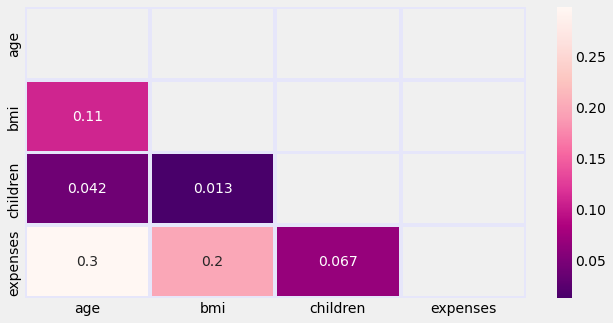

In [306]:
# Plot the Correlation Matrix (Linear Correlation)

matrix = np.triu(data.corr()) # in order to produce only the lower part of the matrix
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True, mask=matrix, cmap="RdPu_r", linecolor = "lavender", linewidth = 3)

plt.savefig("Correlation_Matrix.png")

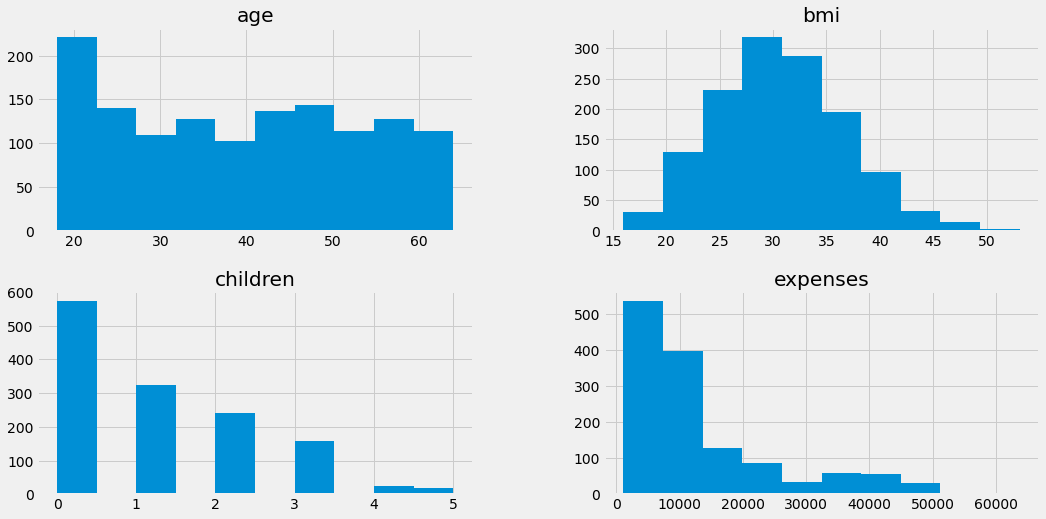

In [307]:
# Histogram per each numerical column

data.hist(figsize=(16, 8))

plt.savefig("Histogram.png")

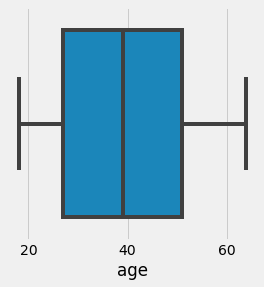

In [308]:
# Boxplot age column 

plt.figure(figsize=(4, 4))
sns.boxplot(x=data['age'])
plt.savefig("Boxplot1.png")

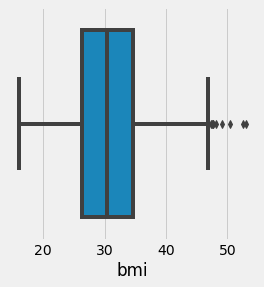

In [309]:
# Boxplot bmi column 

plt.figure(figsize=(4, 4))
sns.boxplot(x=data['bmi'])
plt.savefig("Boxplot2.png")

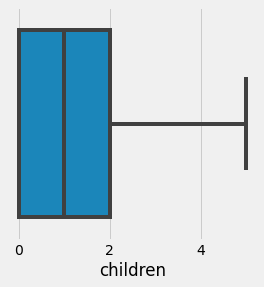

In [310]:
# Boxplot children column 

plt.figure(figsize=(4, 4))
sns.boxplot(x=data['children'])
plt.savefig("Boxplot3.png")


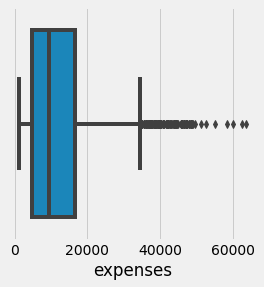

In [311]:
# Boxplot expenses column 

plt.figure(figsize=(4, 4))
sns.boxplot(x=data['expenses'])
plt.savefig("Boxplot4.png")

In [312]:
# check the descriptive summary
data.describe().style.background_gradient(cmap = 'Greens')

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


### Univariate Analysis

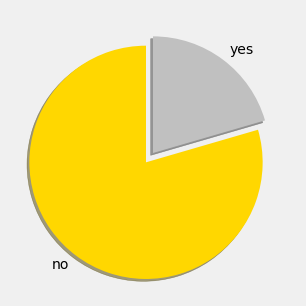

In [313]:
# check the distribution of smoker

plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])
plt.savefig("distribution_smoker.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



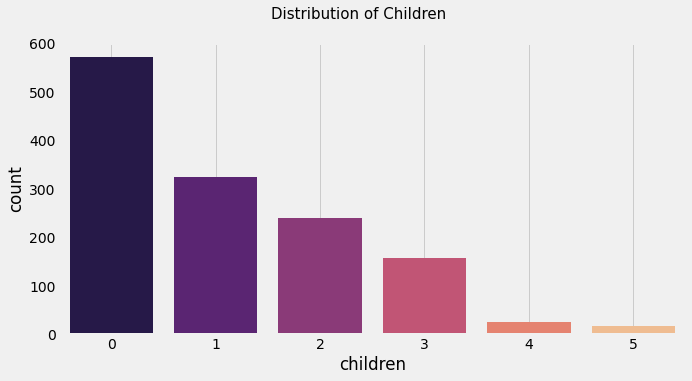

In [314]:
# check the distribution of children

sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.suptitle('Distribution of Children ', fontsize = 15)
plt.show()

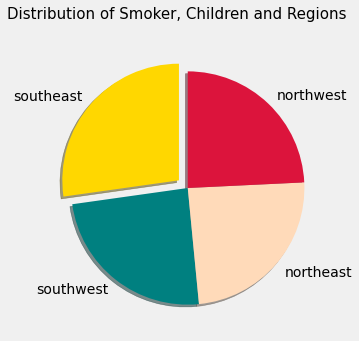

<Figure size 720x360 with 0 Axes>

In [315]:

plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','teal','peachpuff','crimson'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])

plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()
plt.savefig("distribution_region.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



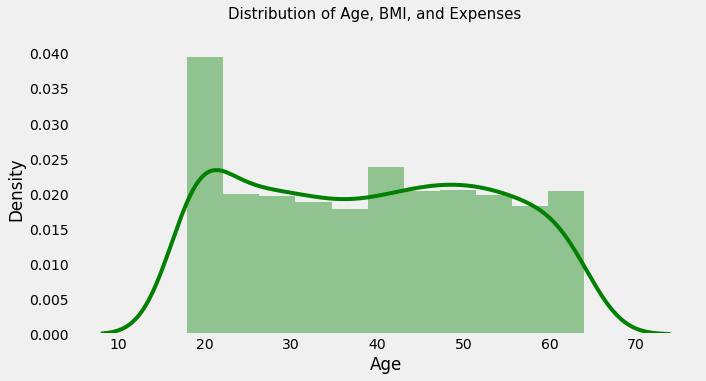

In [316]:
# check the distribution of age

sns.distplot(data['age'], color = 'green')
plt.xlabel('Age')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



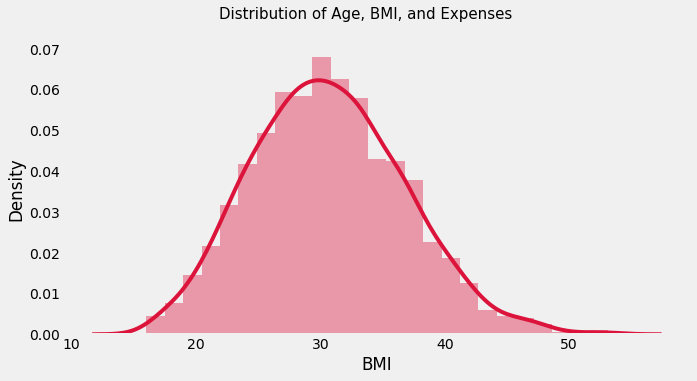

In [317]:
# check the distribution of bmi

sns.distplot(data['bmi'], color = 'crimson')
plt.xlabel('BMI')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



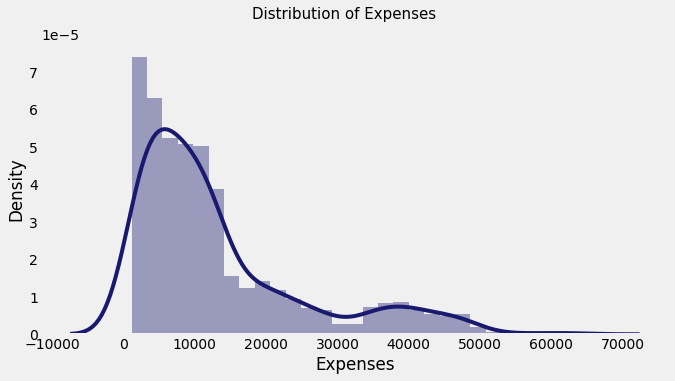

In [318]:
# check the distribution of expenses

sns.distplot(data['expenses'], color = 'midnightblue')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Expenses', fontsize = 15)
plt.show()

### Bivariate Analysis

In [319]:
# understand the impact of age on Medical Expenses
px.scatter(data, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols')

* With Increasing Age, Expense is expeted to increase, but It is not obvious for all the scenarios.

In [320]:
# understand the impact of bmi on Medical Expenses
px.scatter(data, y = 'expenses',
           x = 'bmi',
           marginal_y = 'violin',
           trendline = 'ols')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



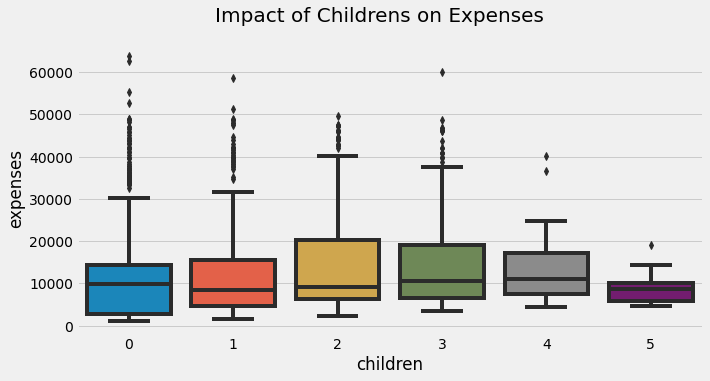

In [321]:
# check the impact of childrens in Medical Expenses

sns.boxplot(data['children'], data['expenses'])

plt.suptitle('Impact of Childrens on Expenses', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



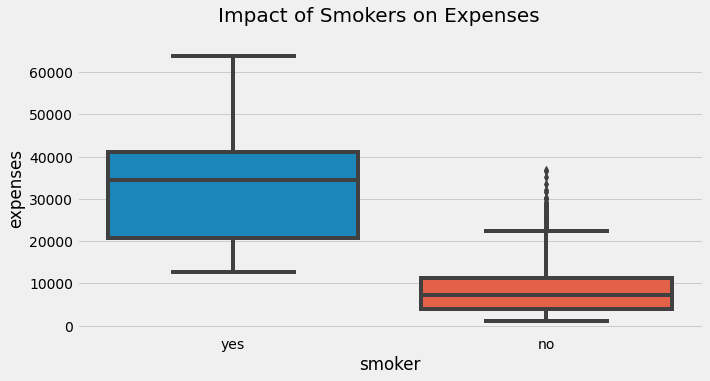

In [322]:
# check the impact of smokers in Medical Expenses

sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smokers on Expenses', fontsize = 20)
plt.show()

## Multivariate Analysis

In [323]:
# As we can see from the above chart that having 4 and 5 childrens is having similar impact on expenses

data['children'] = data['children'].replace((4, 5), (3, 3))

# check the value counts
data['children'].value_counts()

0    573
1    324
2    240
3    200
Name: children, dtype: int64

In [324]:
px.scatter(data,
        x="expenses",
                 y="age",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols")


* The Expenses of Smokers in all regions ranges from 20 to 60k
* Whereas the Expenses of Non Smokers in all regions ranges from 10 to 20K
* The Lesser range of Expense is for lesser age people and vice versa.

In [325]:
px.scatter(data,
        x="expenses",
                 y="bmi",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols")

* We can clearly see that there is a increasing pattern for BMI as well.
* For smoker with less BMI: Expense is around 20k
* For Smokers with High BMI: Expense is around 50K
* For Non Smokers BMI is not a Huge Factor, The Expense range from 5k to 10k

In [326]:
# A Bubble Chart to Represent the relation of Expense with BMI, Age, smoking
# only for the North West Region
px.scatter(data,
                 x="expenses",
                 y="bmi",
                 size="age",
                 color="smoker",
           hover_name="expenses", size_max=15)

* This Chart makes it clear that BMI is not powerful indicator Expenses, as people having less BMI also have high Medical Expenses.
* This chart makes it clear that People who smoke have higher Medical Expenses.
* The Size of Bubble, which represents age, shows that people having higher expenses belong to Higher Expenses category

In [327]:
px.bar_polar(data, r="expenses", theta="region", color = 'sex', template = 'plotly_dark',
            color_discrete_sequence= px.colors.sequential.Plasma_r)

* This Chart clearly depits that the Southeast region has higher expenses compared to other regions.
* This Chart clearly shows that Males have Higher Expenses in general in all the regions.

In [328]:
# check the impact of Regions in Expenses

data[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

In [329]:
# as we can see that all the columns are important, we will not remove any column
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Data Processing

In [330]:
# perform encoding

# as we know males have higher expense than females, lets encode males as 2, and females as 1, 
# similarly smokers, have highers expense, so we will encode smokers as 2, and non smokers as 1,
# as we know that the south east region has higher expense than other regions

data['sex'] = data['sex'].replace(('male','female'), (2, 1))
data['smoker'] = data['smoker'].replace(('yes','no'), (2, 1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(2, 1, 1, 1))

# check whether any categorical column is left
data.select_dtypes('object').columns

Index([], dtype='object')

In [331]:
# check our data again
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [332]:
# form dependent and independent sets

y = data['expenses']
x = data.drop(['expenses'], axis = 1)

print(y.shape)
print(x.columns)

(1337,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [333]:
# perform train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [334]:
# perform standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Predictive Modelling

In [335]:
# create the Model

# create a simple Linear Regression Model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [336]:
# check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",r2_score)

RMSE Score : 6443.455807303003
R2 Score : 0.7532055539825149


In [337]:
# create a Random Forest Model

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

# check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 5278.587878118384
R2 Score : 0.834372218165722


In [338]:
# create a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

# check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred3)
print("R2 Score :",r2_score)

RMSE Score : 5001.186780297707
R2 Score : 0.8513229886511923


In [339]:
# create an ensemble by averaging 

avg_model = (y_pred1 + y_pred2 + y_pred3)/3

# check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, avg_model)
print("R2 Score :",r2_score)

RMSE Score : 5207.000209398749
R2 Score : 0.8388342091263197


In [340]:
# create an weighted averaging model

# give 50% weight to gradient boosting
# 30% weight to random forest
# and 20% weight to linear regression

weight_avg_model = 0.2*y_pred1 + 0.3*y_pred2 + 0.5*y_pred3

# check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, weight_avg_model)
print("R2 Score :",r2_score)

RMSE Score : 5091.994364333715
R2 Score : 0.8458748536268388


In [341]:
##  perform cross validaion

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x, y, cv=5)
print(scores)

[0.87566709 0.79484082 0.89196025 0.84551226 0.85865711]


* as we can see that the scores are not varying much, so we can say that this model is good.

## Comparison of Models

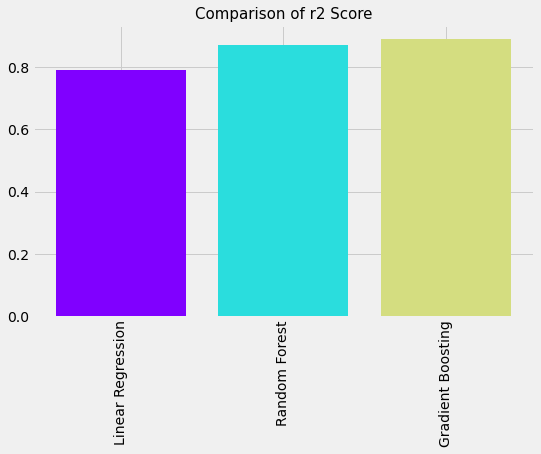

In [342]:
r2_score = np.array([0.79, 0.87, 0.89])
labels = np.array(['Linear Regression', 'Random Forest' 'Gradient Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 3), ['Linear Regression', 'Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()